<a href="https://colab.research.google.com/github/vagmin27/DeepLearning/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np

### Let's define neural network module with 2 hidden layer

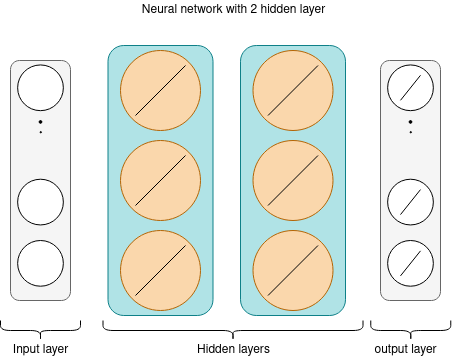

In [2]:
# we create a subclass of nn.Module class for creating a new fn
class Net(nn.Module):
  #constructor
  def __init__(self, D_in, H1, H2, D_out):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(D_in, H1)
    self.linear2 = nn.Linear(H1,H2)
    self.linear3 = nn.Linear(H2, D_out)
  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))
    x = self.linear3(x)
    return x


In [3]:
## Another way to create a model is using nn.Sequential

# model1 = nn.Sequential(nn.Linear(784,50),nn.Sigmoid(),nn.Linear(50,50),nn.Sigmoid(),nn.Linear(50,10))
# model1.parameters
model1 = nn.Sequential(nn.Linear(784,50), nn.Sigmoid(),nn.Linear(50,50), nn.Sigmoid(),nn.Linear(50,10) )
model1.parameters

<bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=50, out_features=10, bias=True)
)>

In [4]:

## create another neural network using tanh activation function
class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = self.linear3(x)
        return x

In [5]:
# Create the model class using Relu as a activation function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H1, H2, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1, H2)
        self.linear3 = nn.Linear(H2, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [6]:
# Creating a Dataset and Dataloader : Dataset that allow you to use pre-loaded datasets as well as your own data.
# Dataset stores the samples and their corresponding labels, and
# DataLoader wraps an iterable around the Dataset to enable easy access to the samples.

# Create the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

# Create the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Create the training data loader and validation data loader object

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=2000, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000, shuffle=False)



100%|██████████| 9.91M/9.91M [00:00<00:00, 52.4MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.63MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.8MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.54MB/s]


In [7]:
for i,j in train_loader :
  print(i.shape,j.shape)
i.view(-1,784)

torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1, 28, 28]) torch.Size([2000])
torch.Size([2000, 1,

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [8]:
train_dataset[0][0].shape
train_dataset[0][1]

5

### Define the training function

In [9]:
# Train the model

def train(model, criterion, train_loader, validation_loader, optimizer, epochs=30):
    i = 0
    loss_and_acc = {'training_loss': [], 'validation_accuracy': []}



    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_and_acc['training_loss'].append(loss.data.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()

        accuracy = 100 * (correct / len(validation_dataset))
        loss_and_acc['validation_accuracy'].append(accuracy)

    return loss_and_acc

-> Define neural network \
-> Define loss function/Criterion function \
-> Define optimizer \
-> Also set the parameters for the nn \
-> set the number of epochs

In [10]:
#define parameters
input_dim = 28 * 28
hidden_dim1 = 50
hidden_dim2 = 50
output_dim = 10

### Train the network using the Sigmoid activation function


In [11]:
epochs = 10
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [12]:

training_results = train(model, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

### Train the network using the Tanh activation function


In [13]:
learning_rate = 0.01
model_Tanh = NetTanh(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr=learning_rate)
training_results_tanch = train(model_Tanh, criterion, train_loader, validation_loader, optimizer, epochs= epochs)

### Train the model with relu function

In [14]:
learning_rate = 0.01
modelRelu = NetRelu(input_dim, hidden_dim1, hidden_dim2, output_dim)
optimizer = torch.optim.SGD(modelRelu.parameters(), lr=learning_rate)
training_results_relu = train(modelRelu, criterion, train_loader, validation_loader, optimizer, epochs=epochs)

### Comparing the results

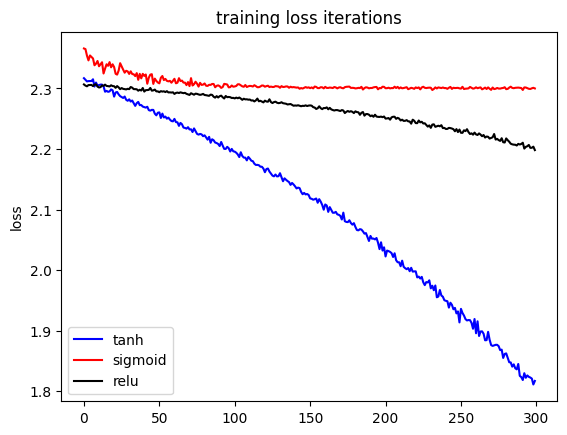

In [15]:
# Comparison of Loss
plt.plot(training_results_tanch['training_loss'], label='tanh', color="blue")
plt.plot(training_results['training_loss'], label='sigmoid', color="red" )
plt.plot(training_results_relu['training_loss'], label='relu', color="black")
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()

### Comparison of validation accuracy

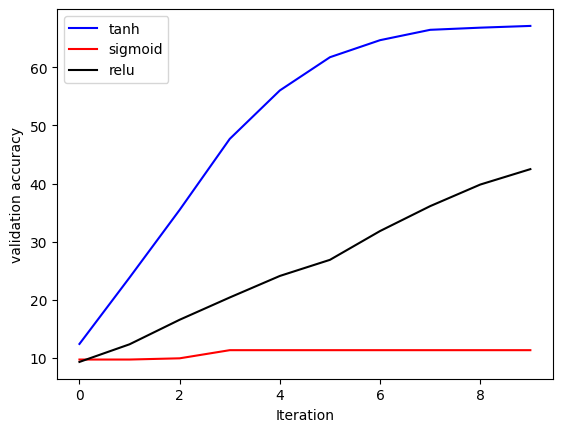

In [16]:
plt.plot(training_results_tanch['validation_accuracy'], label = 'tanh', color="blue")
plt.plot(training_results['validation_accuracy'], label = 'sigmoid', color="red")
plt.plot(training_results_relu['validation_accuracy'], label = 'relu', color="black")
plt.ylabel('validation accuracy')
plt.xlabel('Iteration')
plt.legend()

### Saving and Loading Models

In [17]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
     print(param_tensor, "\t", model.state_dict()[param_tensor].size())
# model.state_dict('linear1.bias')


Model's state_dict:
linear1.weight 	 torch.Size([50, 784])
linear1.bias 	 torch.Size([50])
linear2.weight 	 torch.Size([50, 50])
linear2.bias 	 torch.Size([50])
linear3.weight 	 torch.Size([10, 50])
linear3.bias 	 torch.Size([10])


In [18]:

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5]}]


### Saving & Loading Model for Inference

In [19]:
# Specify a path
PATH = "state_dict_model.pt" #A common PyTorch convention is to save models using either a .pt or .pth file extension.

# Save
torch.save(model.state_dict(), PATH)

# Load
model = Net(input_dim, hidden_dim1, hidden_dim2, output_dim)
model.load_state_dict(torch.load(PATH))

model.eval()
#Remember too, that you must call model.eval() to set dropout and batch normalization layers to evaluation mode before running inference.
#Failing to do this will yield inconsistent inference results.


Net(
  (linear1): Linear(in_features=784, out_features=50, bias=True)
  (linear2): Linear(in_features=50, out_features=50, bias=True)
  (linear3): Linear(in_features=50, out_features=10, bias=True)
)

### Save the general checkpoint

In [21]:
# #Additional information
# EPOCH = 5
# PATH = "model.pt"
# LOSS = 0.4

# torch.save({
#             'epoch': EPOCH,
#             'model_state_dict': net.state_dict(),
#             'optimizer_state_dict': optimizer.state_dict(),
#             'loss': LOSS,
#             }, PATH)



# model = Net()
# optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# checkpoint = torch.load(PATH)
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# epoch = checkpoint['epoch']
# loss = checkpoint['loss']

# model.eval()
# # - or -
# model.train()

#Other ways to define Neural Network


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from matplotlib.colors import ListedColormap
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)

In [23]:
# Define the function to plot the diagram

def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#d7bde2', '#f4d03f', '#e59866'])
    cmap_bold = ListedColormap(['#633974', '#7d6608', '#784212'])
    X = data_set.x.numpy()
    y = data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    XX = torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    # ravel(): Flattened array having same type as the Input array and and order as per choice.
    # np.c_ : add along second axis.
    _, yhat = torch.max(model(XX), 1)
    yhat = yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light)
    #pcolormesh() : function in pyplot module of matplotlib library is used to create a pseudocolor plot
    #with a non-regular rectangular grid.
    plt.plot(X[y[:] == 0, 0], X[y[:] == 0, 1], 'yo', label = 'y=0')
    plt.plot(X[y[:] == 1, 0], X[y[:] == 1, 1], 'r^', label = 'y=1')
    plt.plot(X[y[:] == 2, 0], X[y[:] == 2, 1], 'g<', label = 'y=2')
    plt.title("decision region")
    plt.legend()


### Create Custom Dataloader

In [24]:
class Data(Dataset):
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D)) # data matrix (each row = single example)
        y = np.zeros(N * K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N * j, N * (j + 1))
          r = np.linspace(0.0, 1, N) # radius
          t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
          X[ix] = np.c_[r * np.sin(t), r*np.cos(t)]
          y[ix] = j
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]

    # Getter
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    # Get Length
    def __len__(self):
        return self.len

    # Plot the diagram
    def plot_stuff(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'yo', label="y = 0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'r^', label="y = 1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(), self.x[self.y[:] == 2, 1].numpy(), 'g<', label="y = 2")
        plt.legend()

Neural Network Module using <code>ModuleList()</code>

In [25]:
# Create Net model class

class Net(nn.Module):

    # Constructor
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):  # Layers = [3,5,5,5,5,2]
            self.hidden.append(nn.Linear(input_size, output_size))

    # Prediction
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = torch.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [26]:
# Define the function for training the model

def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    LOSS = []
    ACC = []
    for epoch in range(epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            LOSS.append(loss.item())
        ACC.append(accuracy(model, data_set))
    return LOSS,ACC

# The function to calculate the accuracy

def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

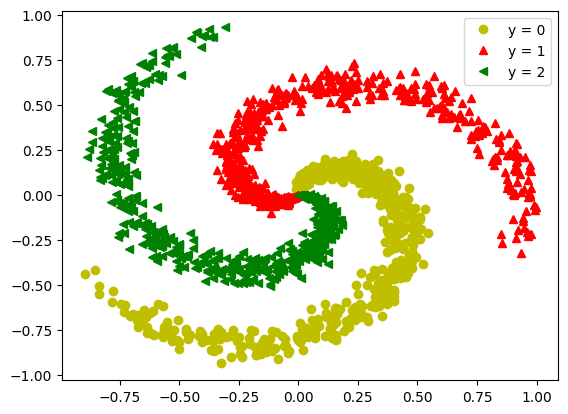

In [27]:
# Create a Dataset object

data_set = Data()
data_set.plot_stuff()
data_set.y = data_set.y.view(-1)

In [28]:
# Train the model with 1 hidden layer with 50 neurons

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
LOSS, ACC = train(data_set, model, criterion, train_loader, optimizer, epochs=100)

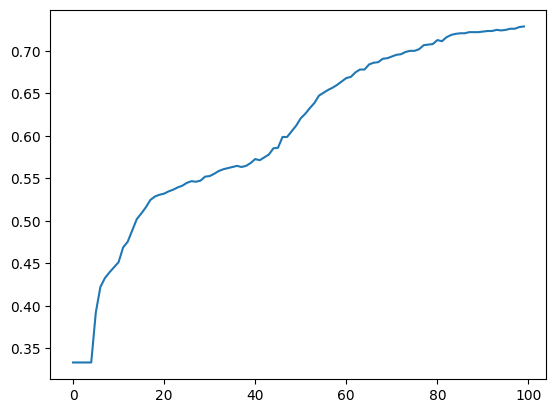

In [29]:
plt.plot(ACC)

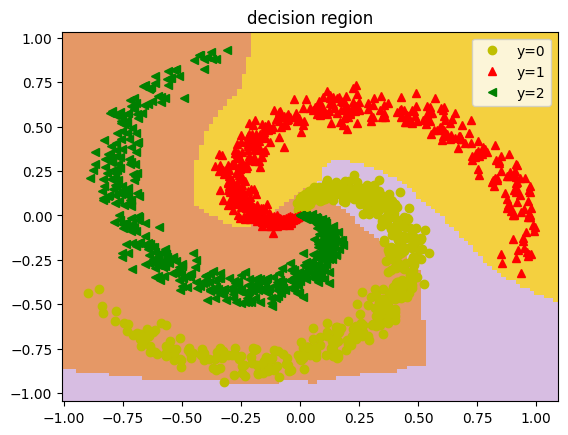

In [30]:
# plot decision region

plot_decision_regions_3class(model, data_set)

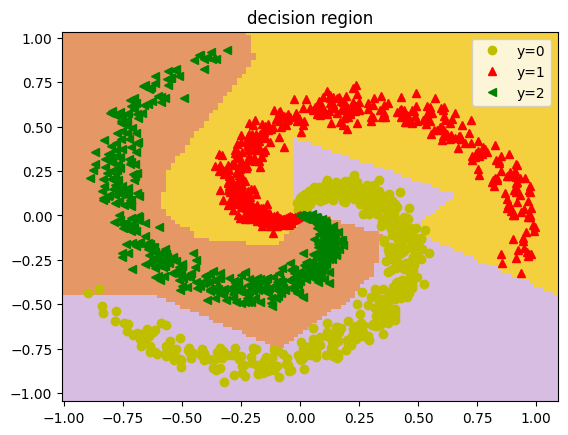

In [32]:
# Train the model with 2 hidden layers with 20 neurons

Layers = [2, 10, 10, 3]
model = Net(Layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
LOSS, ACC = train(data_set, model, criterion, train_loader, optimizer, epochs=1000)

plot_decision_regions_3class(model, data_set)

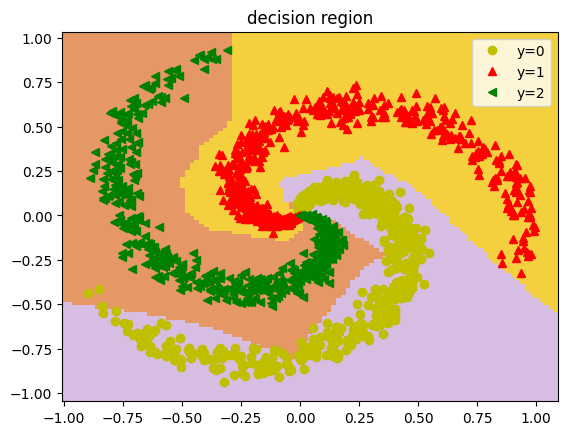

In [33]:
# network with three hidden layers each with ten neurons
Layers = [2, 10, 10, 10, 3]
model = Net(Layers)
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = DataLoader(dataset = data_set, batch_size = 20)
criterion = nn.CrossEntropyLoss()
LOSS, ACC = train(data_set, model, criterion, train_loader, optimizer, epochs = 1000)
plot_decision_regions_3class(model, data_set)